### Task 1
Suponga que usted está trabajando en la industria relacionada con meteorología, por lo cual le interesa saber la probabilidad de que haya N huracanes este año. Se sabe que la frecuencia histórica de huracanes es 7 por año, en otras palabras, el número promedio de huracanes por año es de 7.

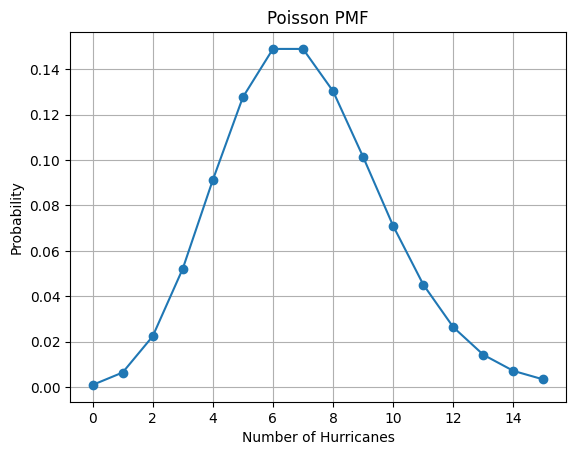

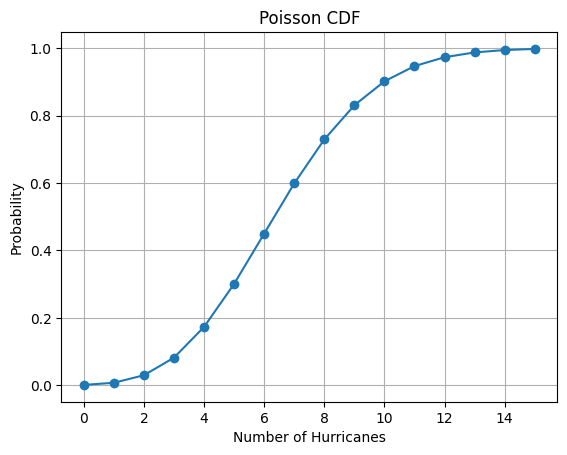

In [92]:
from scipy.stats import poisson, uniform
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
lambdaParam = 7
maxHurricanes = 16

# Crear un arreglo con los valores de x
x = np.arange(0, maxHurricanes)

# Graficar la PMF con un máximo de 16 huracanes
y = poisson.pmf(x, lambdaParam)
plt.plot(x, y, 'o-')
plt.title('Poisson PMF')
plt.xlabel('Number of Hurricanes')
plt.ylabel('Probability')
plt.grid(True)
plt.show()

# Graficar la CDF con un máximo de 16 huracanes
y = poisson.cdf(x, lambdaParam)
plt.plot(x, y, 'o-')
plt.title('Poisson CDF')
plt.xlabel('Number of Hurricanes')
plt.ylabel('Probability')
plt.grid(True)
plt.show()

**¿Es este un escenario que se pueda modelar como una variable aleatoria de Poisson? ¿Por qué?**

Si, es un escenario que se puede modelar como una variable aleatoria de Poisson ya que se trata de un evento que tiene una frecuencia conocida de 7 al año. 


**¿Qué conclusiones puede sacar al observar las gráficas de los ejercicios anteriores?**

TODO



### Task 2
Usted es un analista de simulación encargado de modelar la llegada de clientes a una tienda minorista. Desea simular la cantidad de clientes que llegan por hora utilizando dos métodos diferentes: el método de transformación inversa y el método de rechazo.

### Task 2.1
Defina la distribución de probabilidad objetivo para las llegadas de clientes en función de los datos históricos. Supongamos que ha recopilado datos y descubrió que la cantidad de clientes que llegan por hora sigue una distribución de Poisson con un promedio de 10 clientes por hora (λ = 10).

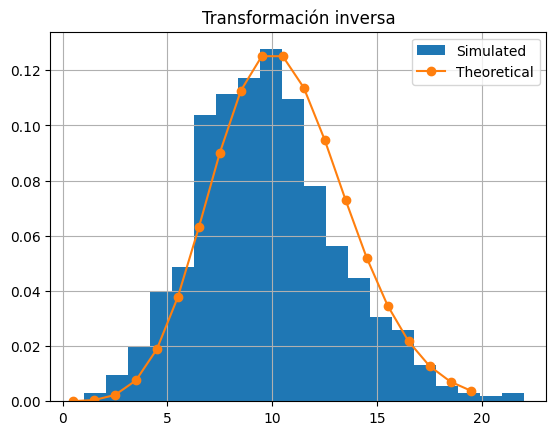

Media de la muestra generada: 9.88 (Teórico: 10)
Varianza de la muestra generada: 10.30 (Teórico: 10)


In [93]:
def poissonInverseTransform(n, lambdaParam):
    sample = np.random.uniform(size=n)
    x = np.zeros_like(sample)

    for i, rand in enumerate(sample):
        probability = 0
        k = 0

        while probability < rand:
            probability += poisson.pmf(k, lambdaParam)
            k += 1
        
        x[i] = k - 1

    return x

# Parametros
lambdaParam = 10
n = 1000

# Valores simulados
y = poissonInverseTransform(n, lambdaParam)
mean = np.mean(y)
var = np.var(y)
plt.hist(y, bins=20, density=True, label='Simulated')

# Valores teoricos
x = np.arange(0, 20)
y = poisson.pmf(x, lambdaParam)
plt.plot(x + 0.5, y, 'o-', label='Theoretical')

plt.legend()
plt.grid(True)
plt.title("Transformación inversa")
plt.show()

print(f"Media de la muestra generada: {mean:.2f} (Teórico: {lambdaParam})")
print(f"Varianza de la muestra generada: {var:.2f} (Teórico: {lambdaParam})")

### Task 2.2
Defina una distribución de propuesta que sea más fácil de muestrear y que cubra el soporte de la distribución de Poisson de destino. Por ejemplo, puede elegir una distribución uniforme o geométrica.

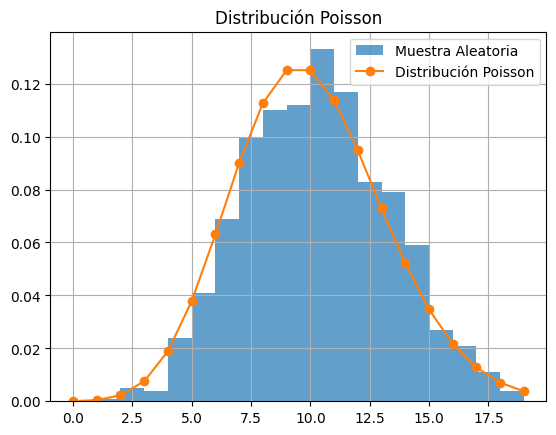

C = 2.50
Media de la muestra generada: 9.79 (Teórico: 10)
Varianza de la muestra generada: 9.36 (Teórico: 10)


In [94]:
def rejectionSampling(lambdaParam, n, C):
    samples = []
    for i in range(n):
        while True:
            y = np.random.randint(0, 20)
            u = np.random.rand()
            if u <= poisson.pmf(y, lambdaParam) / C * uniform.pdf(y, 0, 20):
                samples.append(y)
                break
    return samples

# Parametros
lambdaParam = 10
n = 1000
y = np.arange(0, 20)

# Cálculo de C
C = max(poisson.pmf(y, lambdaParam) / uniform.pdf(y, 0, 20))

# Valores simulados
samples = rejectionSampling(lambdaParam, n, C)
mean = np.mean(samples)
var = np.var(samples)
plt.hist(samples, bins=y, density=True, alpha=0.7, label='Muestra Aleatoria')

# Valores teóricos
pmfValues = poisson.pmf(y, lambdaParam)
plt.plot(y, pmfValues, '-o', label='Distribución Poisson')

plt.legend()
plt.grid(True)
plt.title('Distribución Poisson')
plt.show()

print(f"C = {C:.2f}")
print(f"Media de la muestra generada: {mean:.2f} (Teórico: {lambdaParam})")
print(f"Varianza de la muestra generada: {var:.2f} (Teórico: {lambdaParam})")